# Student Experiment – Redox Reaction of RuHex couple 

## Visualize experimental results 

-0.18
-0.1805
-0.1815
-0.1805
-0.181
-0.181
-0.1815


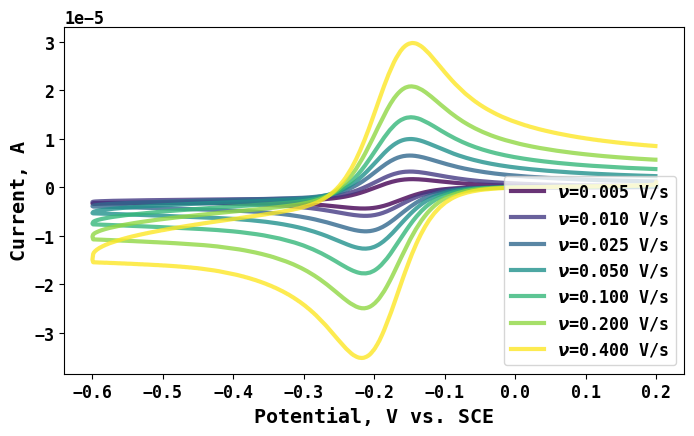

In [1]:
from matplotlib import pyplot as plt 
import pandas as pd 
import numpy as np 
import matplotlib.ticker as mtick
from matplotlib.cm import tab10,viridis,Blues



linewidth = 3
fontsize = 12
figsize = [8,4.5]

font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : fontsize }
plt.rc('font', **font)  # pass in the font dict as kwarg

scan_rates = [0.005,0.01,0.025,0.05,0.1,0.2,0.4] # V/s 
peak_currents = [] #A, to be collected by iterating all voltammograms
forward_scan_peak_potentials = []
reverse_scan_peak_potentials = []
colors = viridis(np.linspace(0,1,len(scan_rates)))
df = pd.read_excel('RuHex CV.xlsx')


fig, ax = plt.subplots(figsize=(8,4.5))

for index, scan_rate in enumerate(scan_rates):
    #Iterate all voltammograms in this file corresponding to scans at different scan rates
    ax.plot(df.iloc[:,2*index],df.iloc[:,2*index+1],label=f'$\\nu$={scan_rate:.3f} V/s',color=tuple(colors[index]),alpha=0.8,lw=3)
    peak_current = df.iloc[:,2*index+1].min()
    peak_currents.append(peak_current)
    forward_scan_peak_potential = df.iloc[df.iloc[:,2*index+1].idxmin(),2*index]
    forward_scan_peak_potentials.append(forward_scan_peak_potential)
    reverse_scan_peak_potential = df.iloc[df.iloc[:,2*index+1].idxmax(),2*index]
    reverse_scan_peak_potentials.append(reverse_scan_peak_potential)

    print((forward_scan_peak_potential+reverse_scan_peak_potential)/2)

    df_individual  = pd.DataFrame({'Potential, V':df.iloc[:,2*index],'Current, A':df.iloc[:,2*index+1]})
    
    df_individual.to_csv(f'./Individual Voltammograms/{scan_rate:.2E}.csv',index=False)
    

ax.set_xlabel('Potential, V vs. SCE',fontsize='large',fontweight='bold')
ax.set_ylabel('Current, A',fontsize='large',fontweight='bold')
ax.legend()

fig.savefig('RuHexCV.png',dpi=250,bbox_inches='tight')



## Data Analysis 
Using linear regression to obtain the diffusion coefficient. 

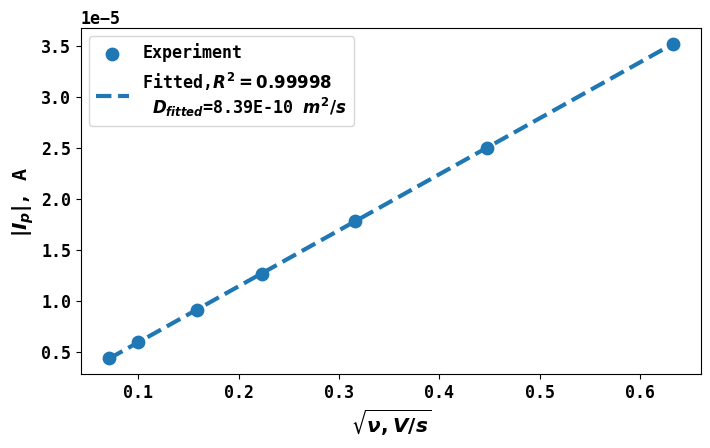

In [10]:
from sklearn.linear_model import LinearRegression

A = np.pi*1.5e-3*1.5e-3#Area of electrode, m^2 
C = 1.0 #Bulk concentration of RuHex, 1 mol/m^3 
F = 96485 #Faraday constant, C/mol 
R = 8.314 #Gas constant, J/(mol*K)
T = 298 #Temperature, K

lr = LinearRegression()

fig,ax = plt.subplots(figsize=(8,4.5))

ax.scatter(np.sqrt(scan_rates),np.abs(peak_currents),label='Experiment',s=80)

lr.fit(np.sqrt(scan_rates).reshape(-1,1),np.abs(peak_currents)) #Fitting the square root of scan rate with peak currents
score = lr.score(np.sqrt(scan_rates).reshape(-1,1),np.abs(peak_currents)) #Obtain the coefficient of determination
D_fitted = (lr.coef_[0]/(0.4463*1*F*A*C*(1*F/(R*T))**0.5))**2
ax.plot(np.sqrt(scan_rates),np.sqrt(scan_rates)*lr.coef_[0]+lr.intercept_,ls='--',label=f'Fitted,$R^2={score:.5f}$ \n $D_{{fitted}}$={D_fitted:.2E} $m^2/s$',lw=3,)

ax.set_xlabel(r'$\sqrt{\nu, V/s}$',fontsize='large',fontweight='bold')
ax.set_ylabel(r'$|I_p|$, A',fontsize='large',fontweight='bold')
ax.legend()
fig.savefig('R-S analysis.png',dpi=250,bbox_inches='tight')